# PCA and LDA

In [2]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
os.chdir("C:/Users/PC/Desktop/Work/faces")
#Please change to corresponding directory

In [3]:
files=os.listdir()
fp=np.array(files)
# load the images
images=[]
for i in range(len(fp)):
    img=cv2.imread(fp[i])
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images.append(np.array(gray_img))
np.shape(images)
images=np.array(images)
print(images.shape)

(165, 170, 125)


[3, 14, 26, 34, 50, 55, 68, 81, 96, 108, 116, 124, 136, 153, 159]
150
(150, 170, 125)


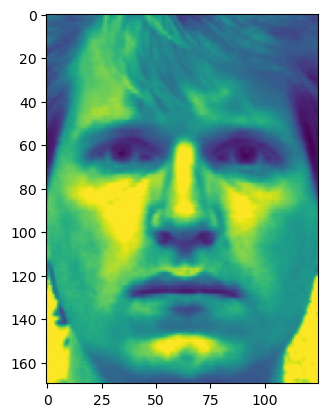

(15, 170, 125)


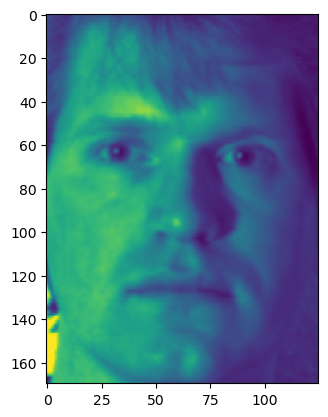

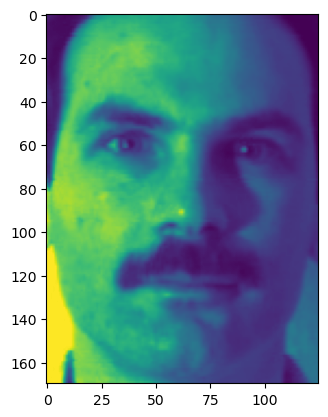

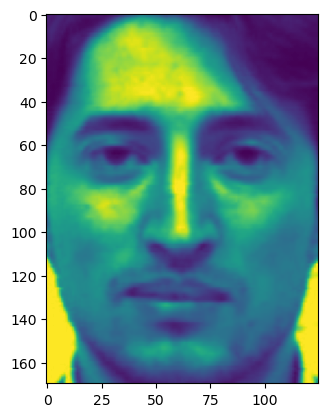

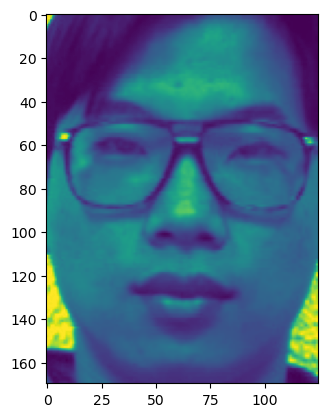

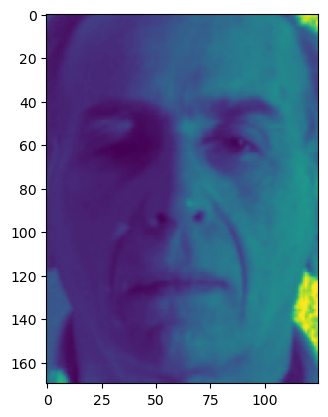

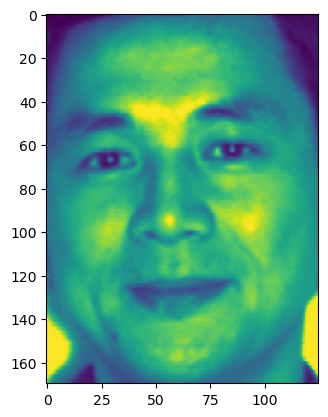

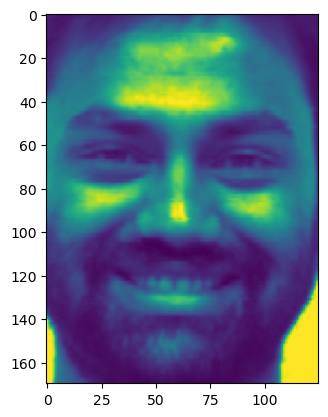

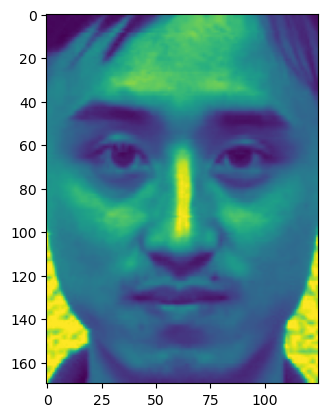

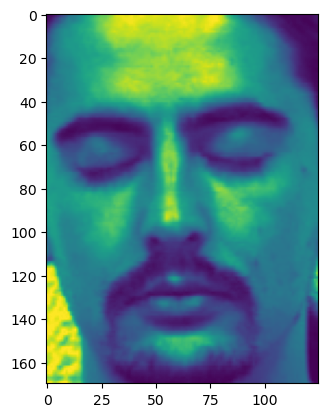

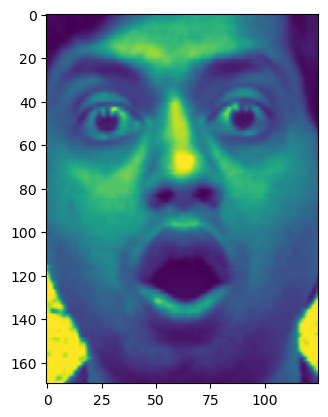

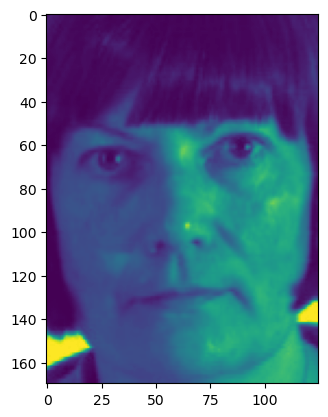

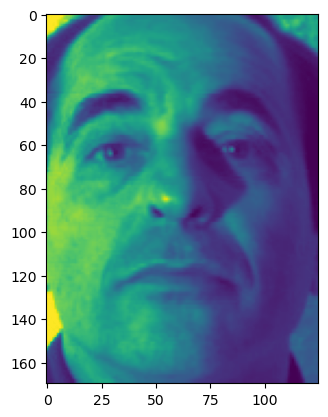

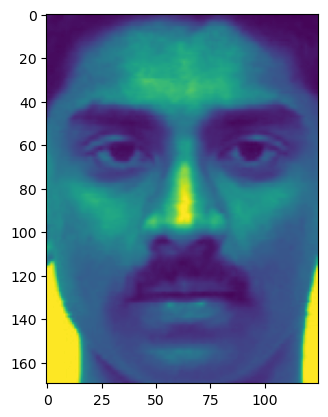

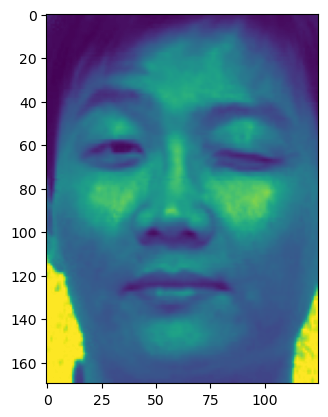

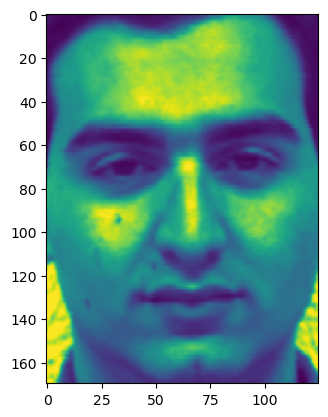

In [12]:
import random
# Create a list of values from 0 to 164
values = list(range(165))
# Define the size of each subsequence
subseq_size = 11
# Create a list of random elements from each subsequence
indices_to_test = [random.choice(values[i:i+subseq_size]) for i in range(0, len(values), subseq_size)]
indices_to_keep=[value for value in values if value not in indices_to_test]
print(indices_to_test)
print(len(indices_to_keep))
train_images=images[indices_to_keep, :,:]
print(train_images.shape)
plt.imshow(train_images[3])
plt.show()
test_images=images[indices_to_test, :,:]
print(test_images.shape)
for i in range(15):
    plt.imshow(test_images[i])
    plt.show()


(150, 3000)


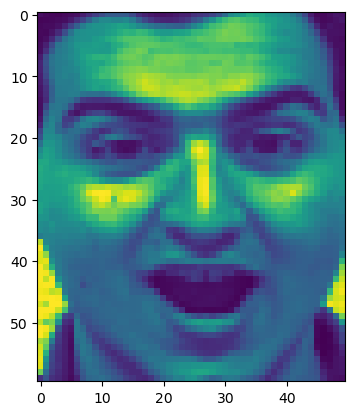

(15, 3000)


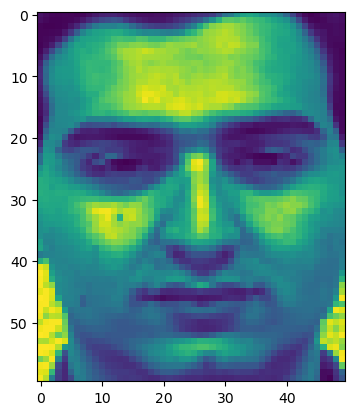

In [13]:
# forming the training and test set
Xtrain=[]
for i in range(150):
    img_1=train_images[i]
    img=cv2.resize(img_1,(50,60))
    img=img.reshape(50*60)
    Xtrain.append(np.array(img))
Xtrain=np.array(Xtrain)
print(Xtrain.shape)
cd=Xtrain[148].reshape(60,50)
plt.imshow(cd)
plt.show()

Xtest=[]
for i in range(15):
    img_1=test_images[i]
    img=cv2.resize(img_1,(50,60))
    img=img.reshape(50*60)
    Xtest.append(np.array(img))
Xtest=np.array(Xtest)
print(Xtest.shape)
cd=Xtest[14].reshape(60,50)
plt.imshow(cd)

In [15]:
# mean for train set
mean_Xtrain=np.mean(Xtrain,axis=0)
print(mean_Xtrain.shape)
print(mean_Xtrain)

(3000,)
[ 56.15333333  44.83333333  35.18       ... 100.62666667 112.4
 135.36666667]


In [16]:
#mean centered samples
print(Xtrain)
X=Xtrain-mean_Xtrain #mean centered samples
print(X)

[[ 63  56  48 ... 255 255 255]
 [ 87  85  84 ... 255 255 250]
 [110 100  94 ... 255 249 254]
 ...
 [ 19  12   8 ...   2  11  22]
 [ 10   6   4 ...  14  11   9]
 [ 20  11   9 ...   3   7  36]]
[[   6.84666667   11.16666667   12.82       ...  154.37333333
   142.6         119.63333333]
 [  30.84666667   40.16666667   48.82       ...  154.37333333
   142.6         114.63333333]
 [  53.84666667   55.16666667   58.82       ...  154.37333333
   136.6         118.63333333]
 ...
 [ -37.15333333  -32.83333333  -27.18       ...  -98.62666667
  -101.4        -113.36666667]
 [ -46.15333333  -38.83333333  -31.18       ...  -86.62666667
  -101.4        -126.36666667]
 [ -36.15333333  -33.83333333  -26.18       ...  -97.62666667
  -105.4         -99.36666667]]


In [17]:
# covarinace of mean centered matrix
cov_mat=np.cov(X.T)
print(cov_mat.shape)
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

(3000, 3000)


In [18]:
print(eigenvalues.shape)
eigenvalues=abs(eigenvalues)
print(eigenvalues)
print(eigenvectors.shape)

(3000,)
[1.52943659e+06 1.17532249e+06 6.86863161e+05 ... 7.22025869e-13
 9.61464287e-13 1.14738736e-12]
(3000, 3000)


In [11]:
eig_temp=abs(eigenvalues.reshape(3000,1))
eeta=0.98
eig_temp=eig_temp/np.sum(abs(eigenvalues))
s=0
for i in range(len(eig_temp)):
    s+=eig_temp[i]
    if(s>eeta):
        break
print(i)

82


In [19]:
# finding top k eigen values
eigenvectors=np.real(eigenvectors)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[ :,idx]

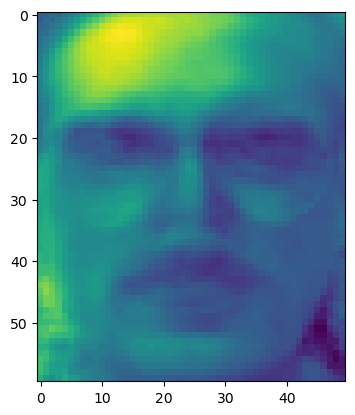

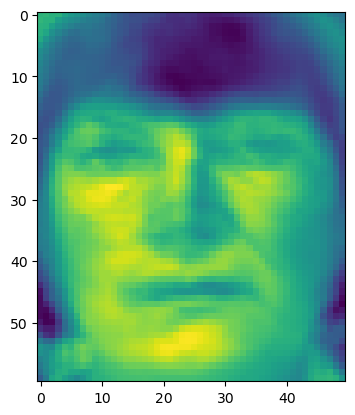

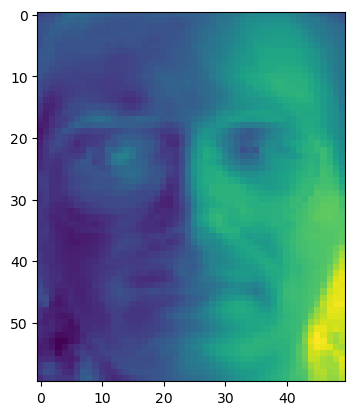

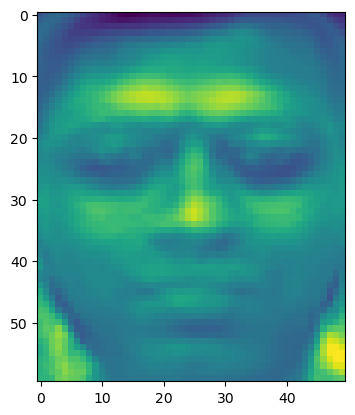

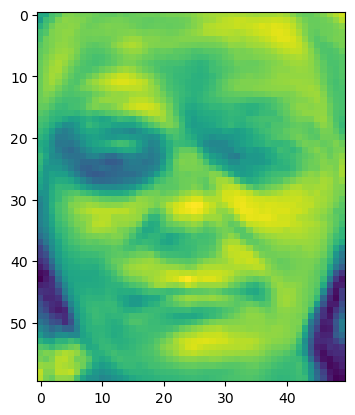

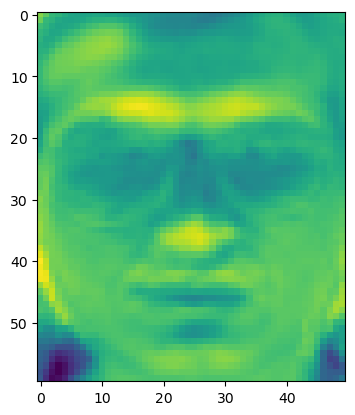

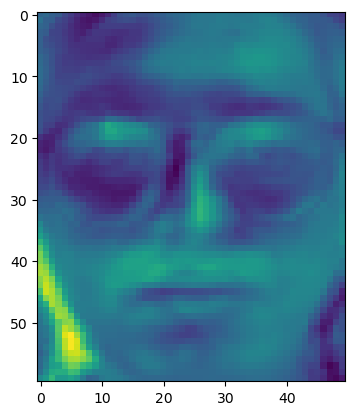

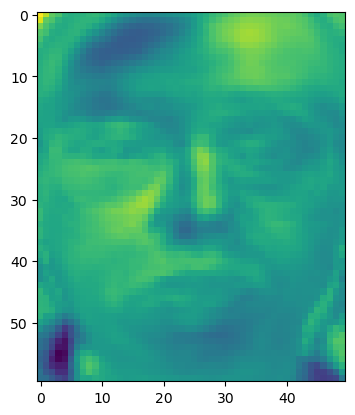

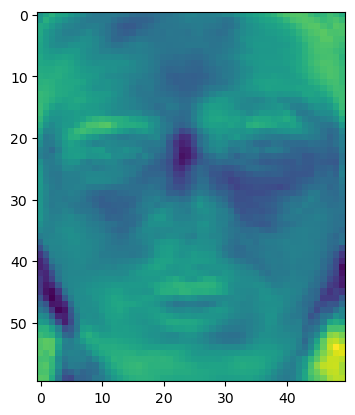

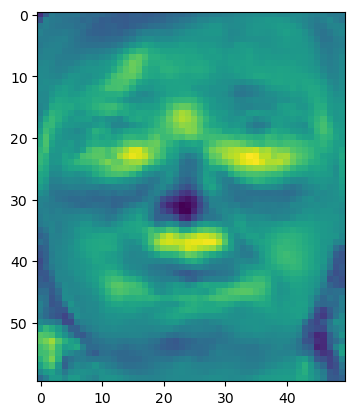

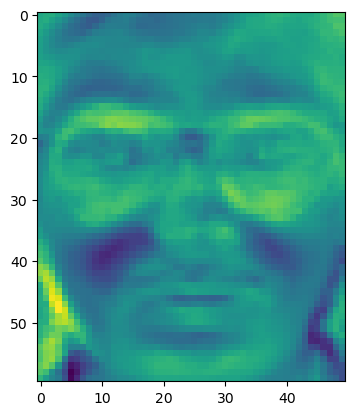

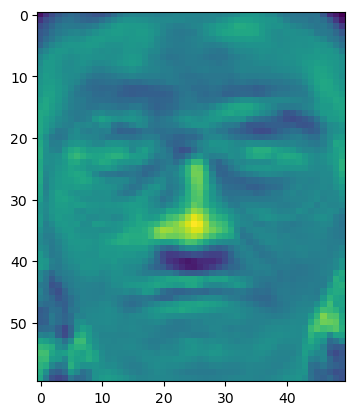

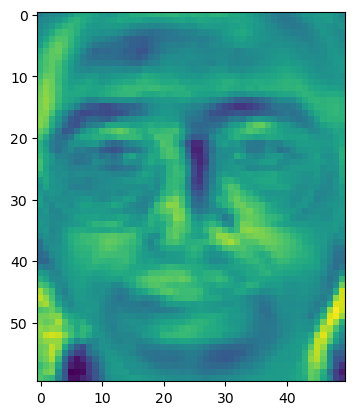

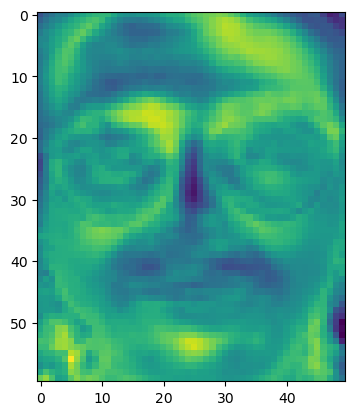

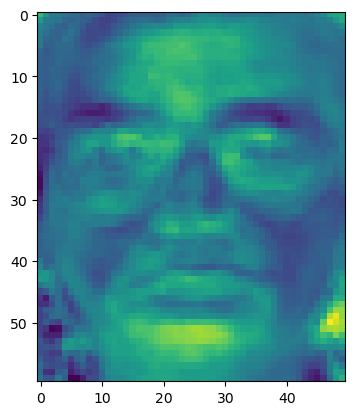

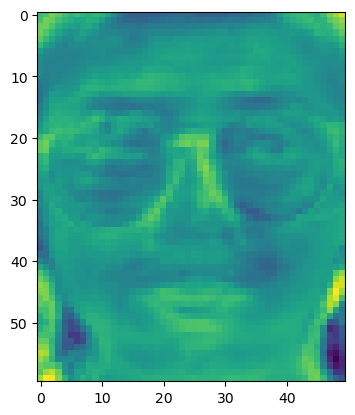

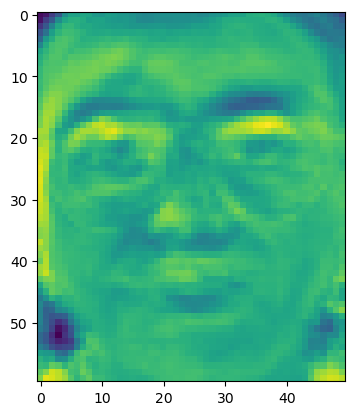

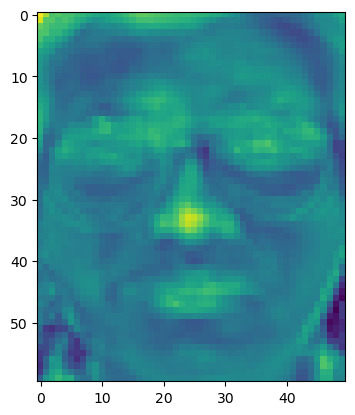

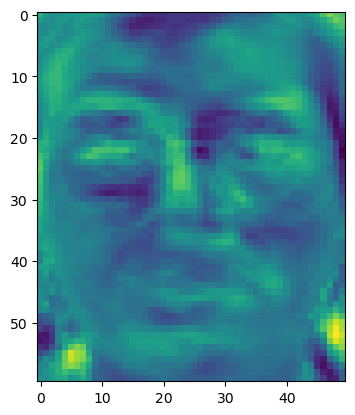

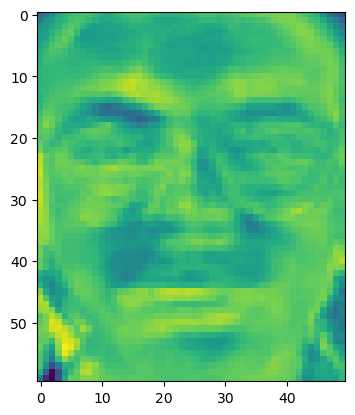

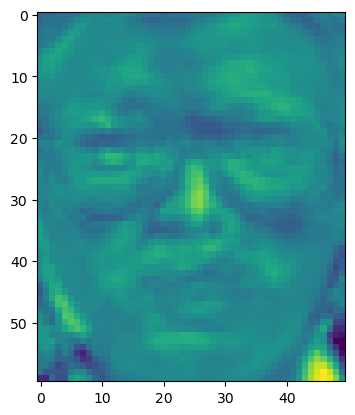

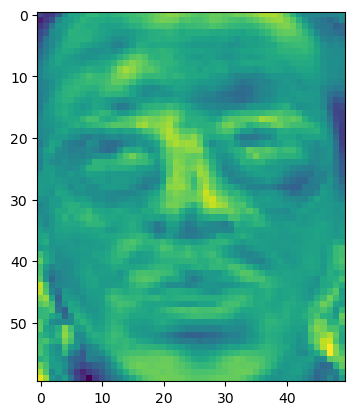

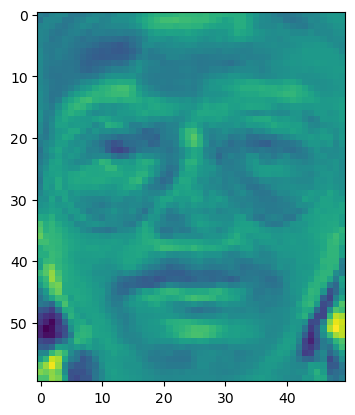

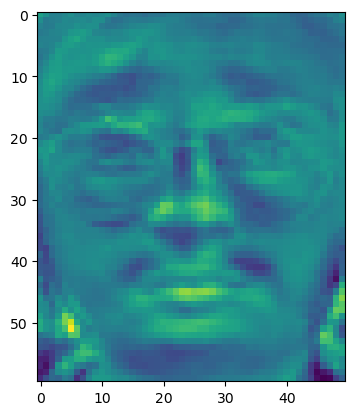

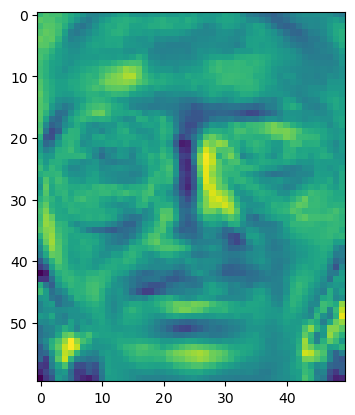

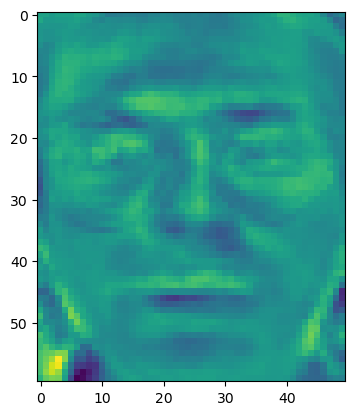

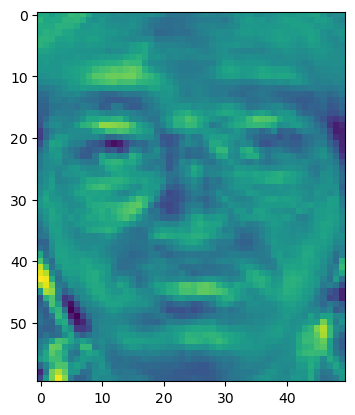

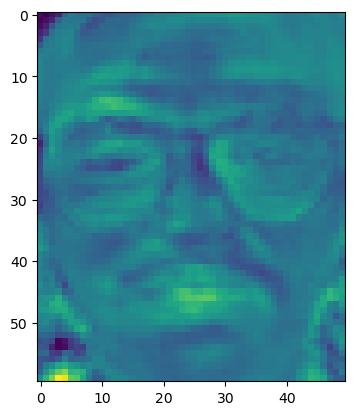

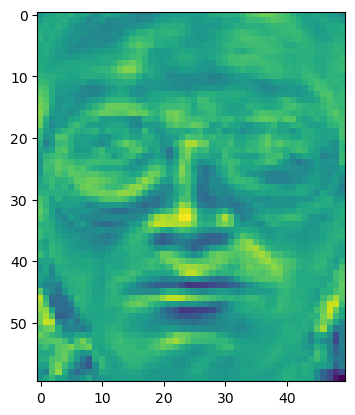

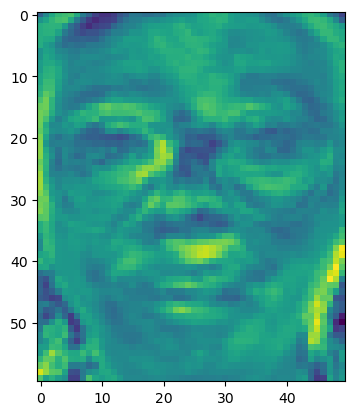

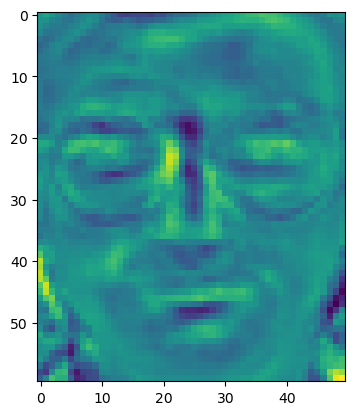

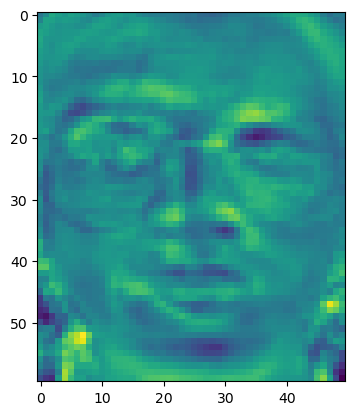

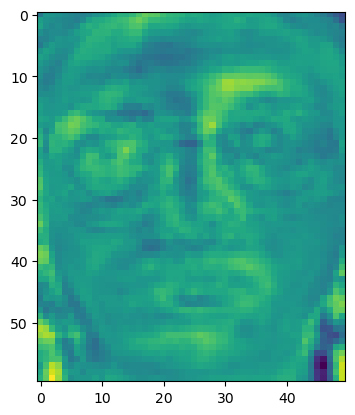

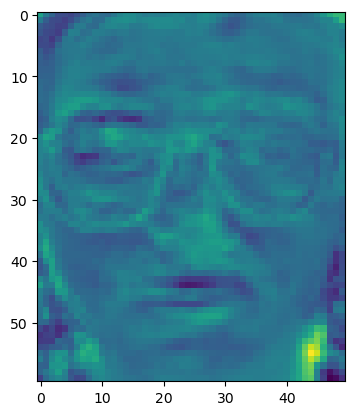

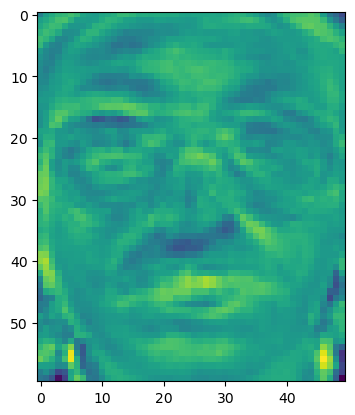

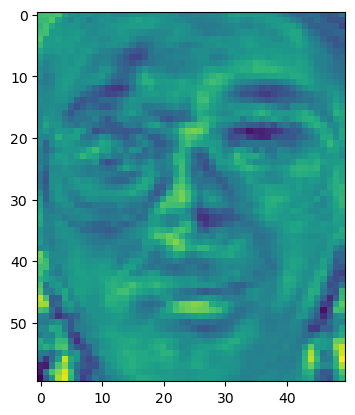

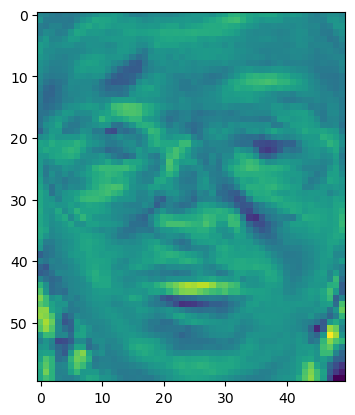

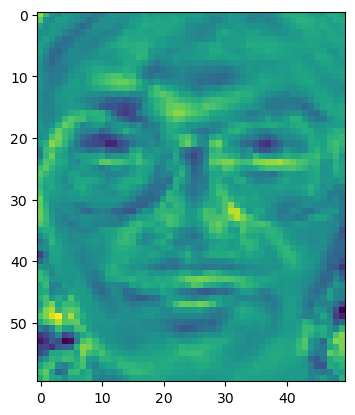

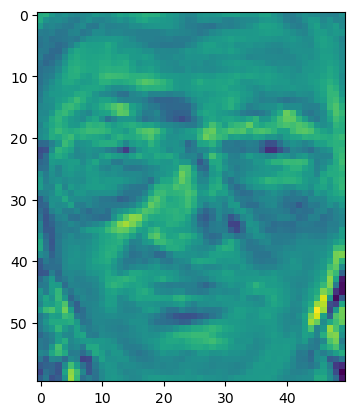

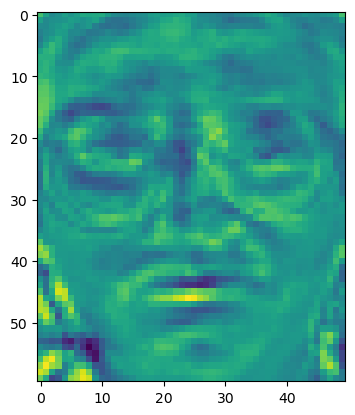

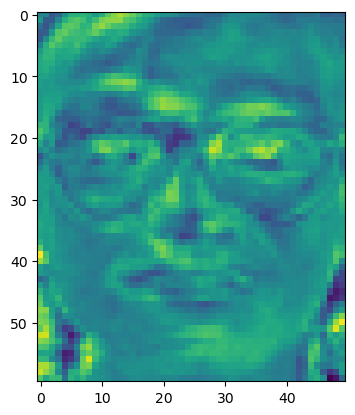

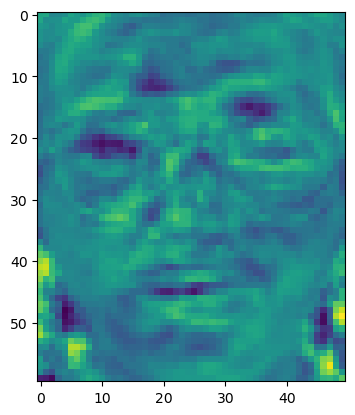

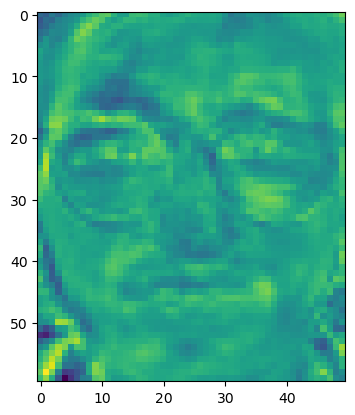

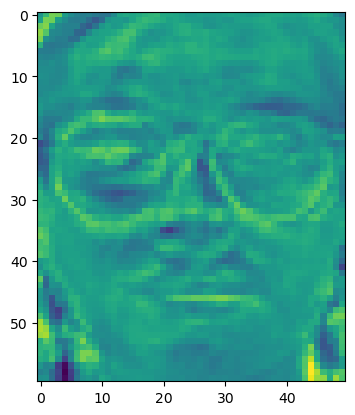

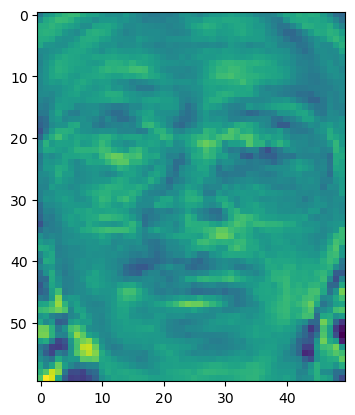

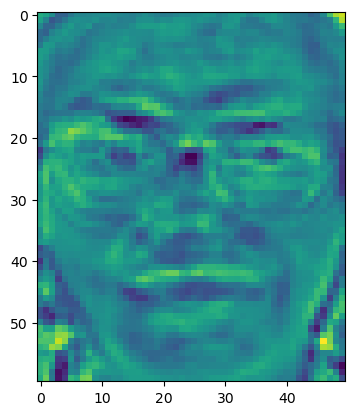

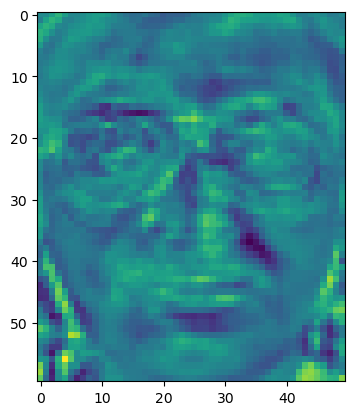

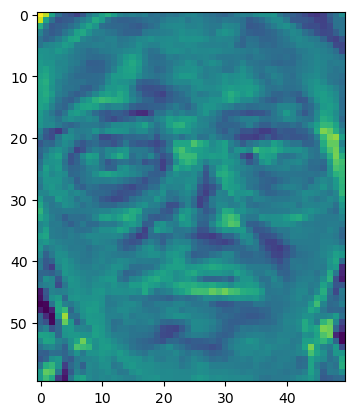

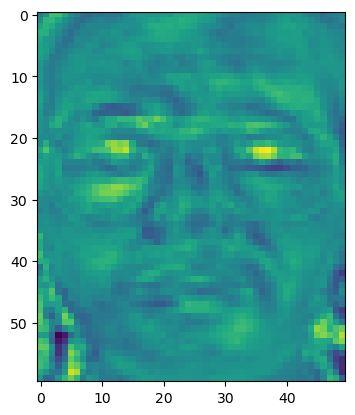

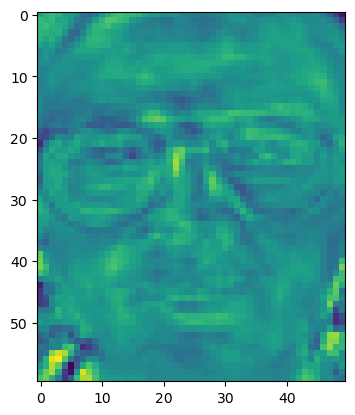

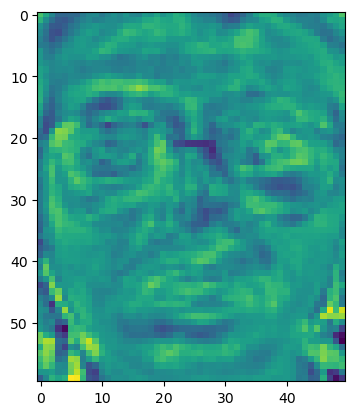

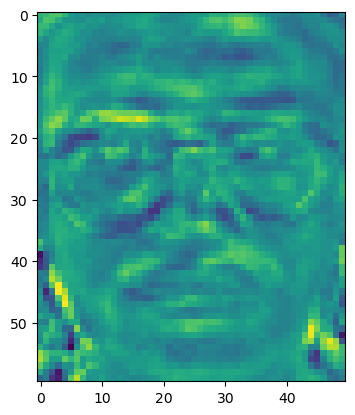

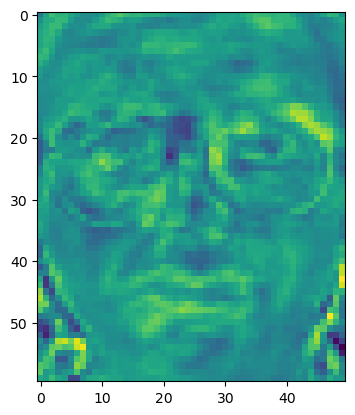

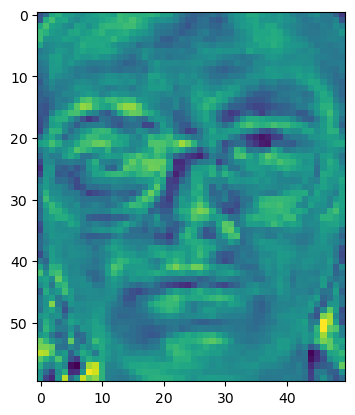

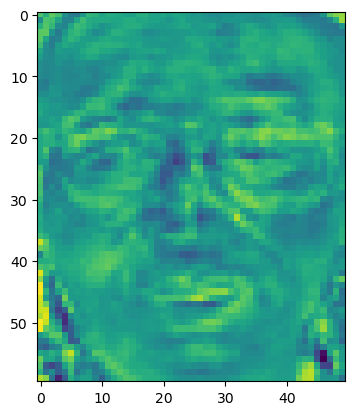

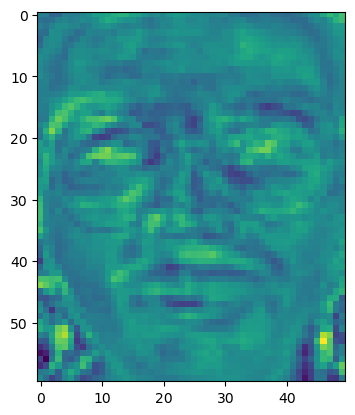

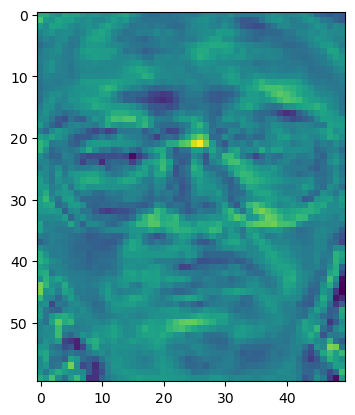

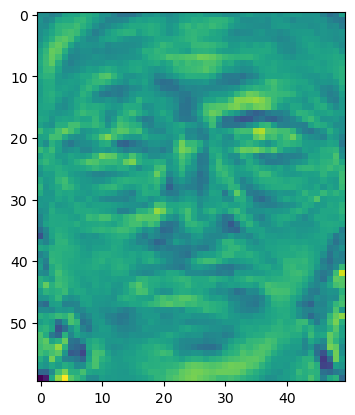

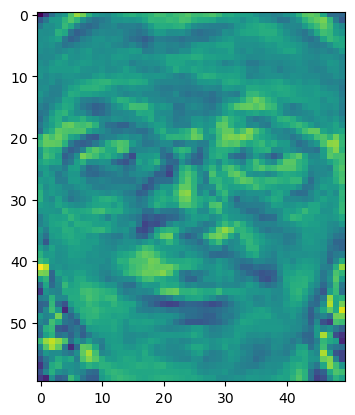

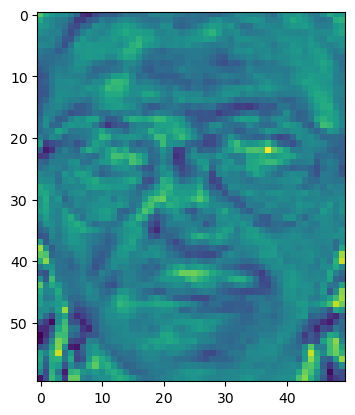

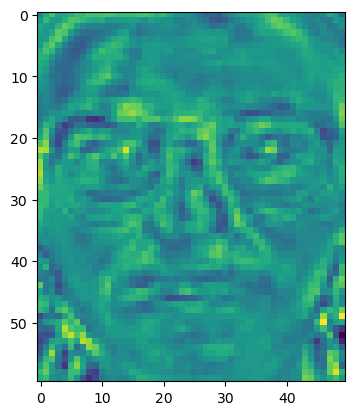

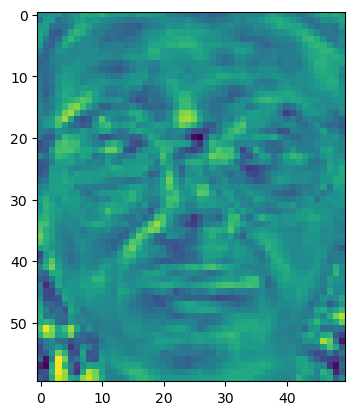

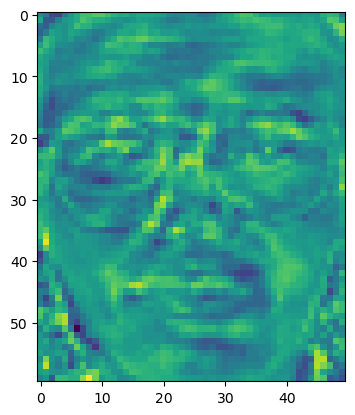

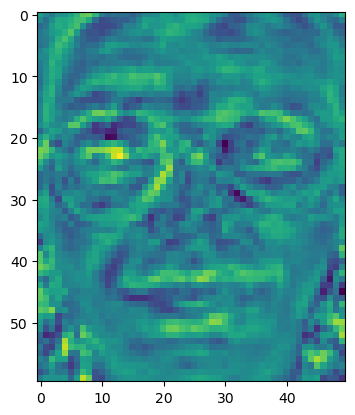

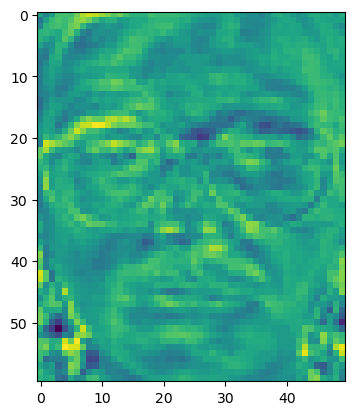

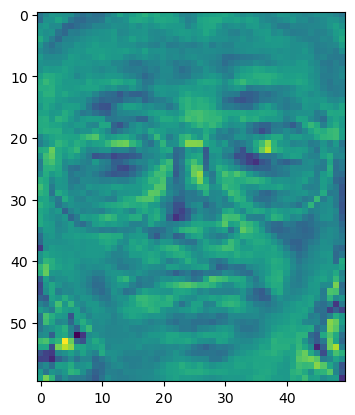

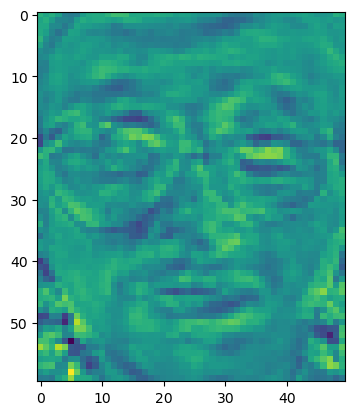

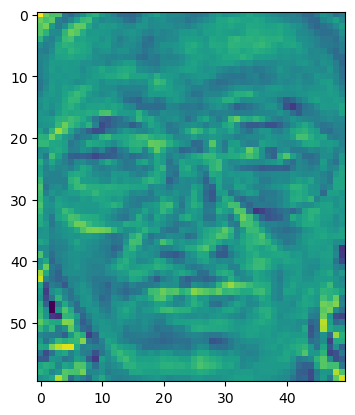

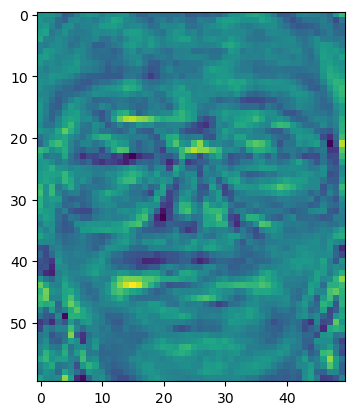

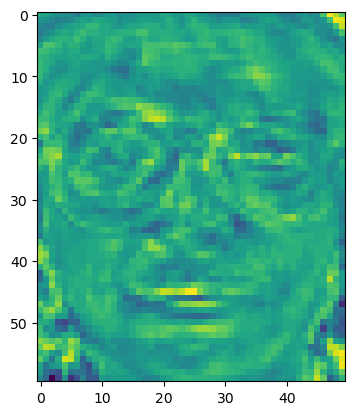

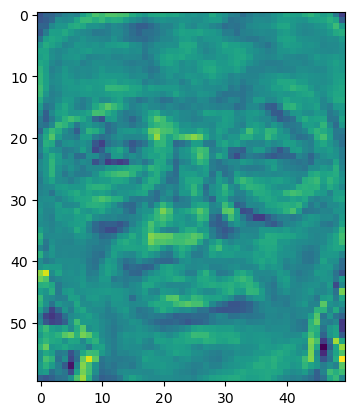

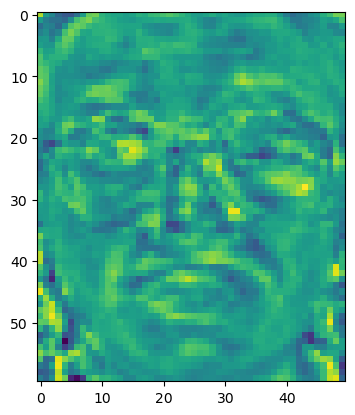

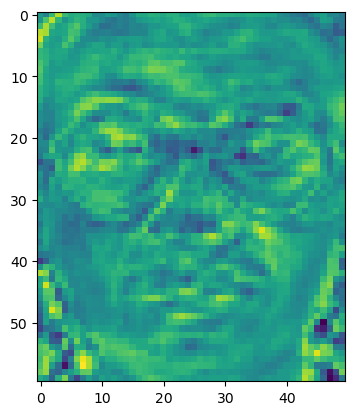

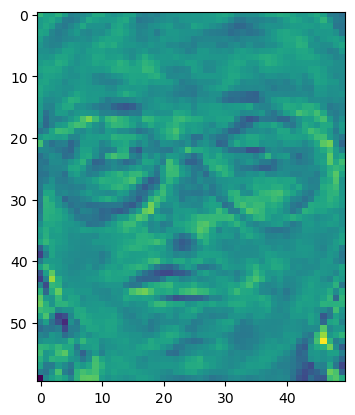

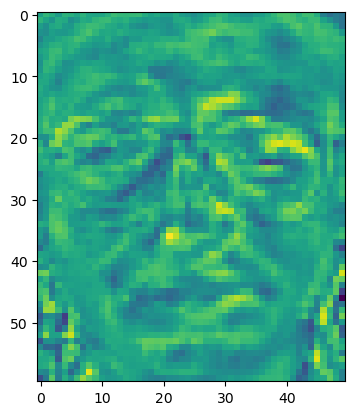

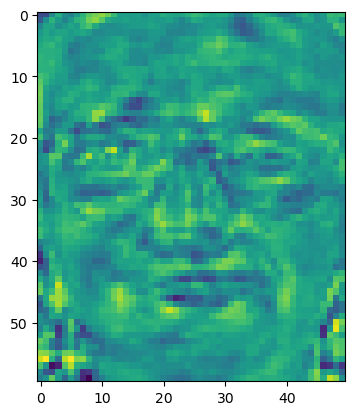

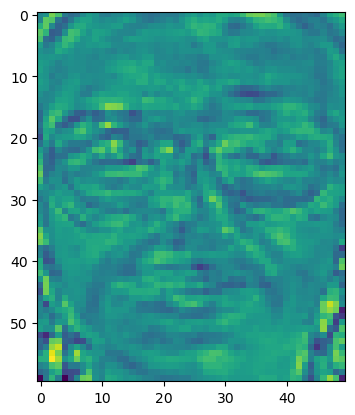

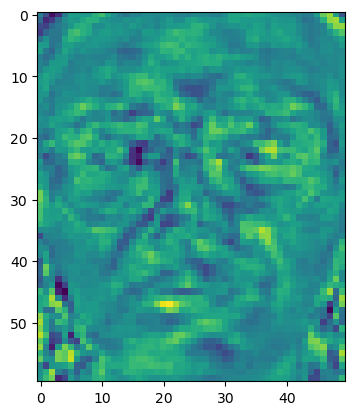

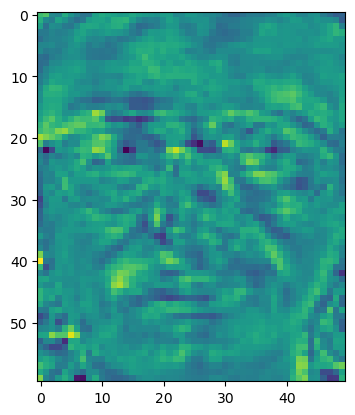

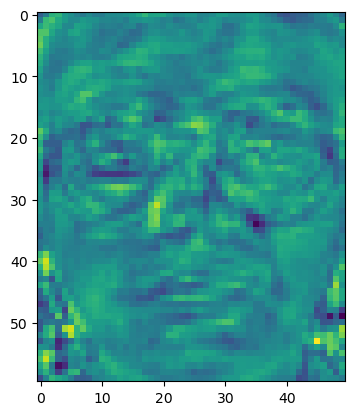

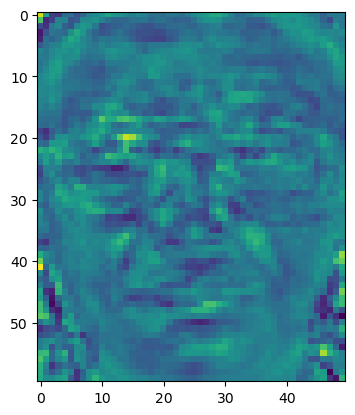

In [20]:
ef=[]
for k in range(81):
    eigenface = eigenvectors[:,k ].reshape((60,50))
    plt.imshow(eigenface)
    ef.append(eigenvectors[:,k])
    plt.show()
ef=np.array(ef)

In [14]:
ef.shape

(81, 3000)

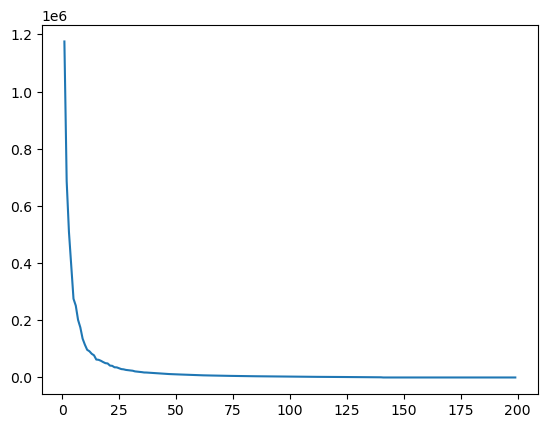

In [21]:
ev=np.real(eigenvalues)
xval=np.arange(3000)
plt.plot(xval[1:200,],ev[1:200])

(165, 3000)


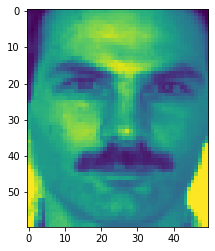

(3000,)
[ 55.99393939  44.41212121  35.24242424 ... 100.90909091 113.04242424
 133.99393939]
[[ 63  56  48 ... 255 255 255]
 [ 87  85  84 ... 255 255 250]
 [110 100  94 ... 255 249 254]
 ...
 [ 19  12   8 ...   2  11  22]
 [ 10   6   4 ...  14  11   9]
 [ 20  11   9 ...   3   7  36]]
[[   7.00606061   11.58787879   12.75757576 ...  154.09090909
   141.95757576  121.00606061]
 [  31.00606061   40.58787879   48.75757576 ...  154.09090909
   141.95757576  116.00606061]
 [  54.00606061   55.58787879   58.75757576 ...  154.09090909
   135.95757576  120.00606061]
 ...
 [ -36.99393939  -32.41212121  -27.24242424 ...  -98.90909091
  -102.04242424 -111.99393939]
 [ -45.99393939  -38.41212121  -31.24242424 ...  -86.90909091
  -102.04242424 -124.99393939]
 [ -35.99393939  -33.41212121  -26.24242424 ...  -97.90909091
  -106.04242424  -97.99393939]]


In [16]:
Xtotal=[]
for i in range(165):
    img_1=images[i]
    img=cv2.resize(img_1,(50,60))
    img=img.reshape(50*60)
    Xtotal.append(np.array(img))
Xtotal=np.array(Xtotal)
print(Xtotal.shape)
cd=Xtrain[10].reshape(60,50)
plt.imshow(cd)
plt.show()

# mean centred samples
mean_Xtotal=np.mean(Xtotal,axis=0)
print(mean_Xtotal.shape)
print(mean_Xtotal)
print(Xtotal)
X_t=Xtotal-mean_Xtotal #mean centered samples
print(X_t)



In [17]:
#projection onto K-dimensional space  (k=20)
Proj_images=np.dot(X_t,ef.T)
print(Proj_images.shape)


(165, 81)


In [18]:
# finding the corresponding train image for test image in k-dimensional space
dict={}

for i in indices_to_test:
    a=Proj_images[i,:]
    #print(a)
    min_val=float('inf')
    for j in indices_to_keep:
        b=Proj_images[j,:]
        #print(b)
        #print(np.linalg.norm(a-b))
        if min_val>(np.linalg.norm(a-b)):
            min_val=np.linalg.norm(a-b)
            dict[i]=j
      

The test image is


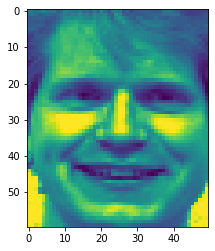

The Predicted image is


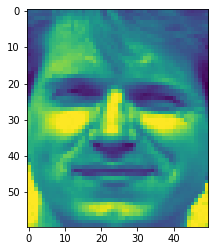

The test image is


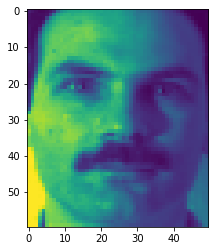

The Predicted image is


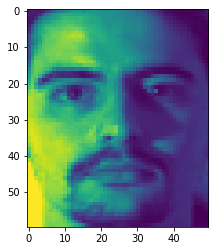

The test image is


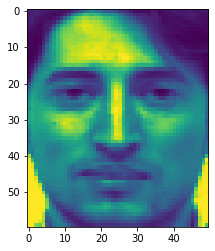

The Predicted image is


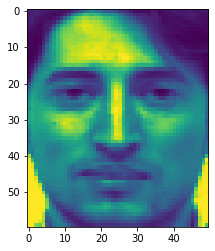

The test image is


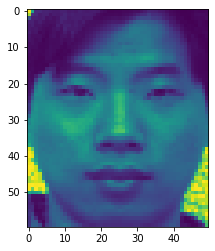

The Predicted image is


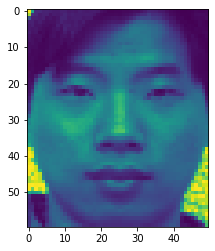

The test image is


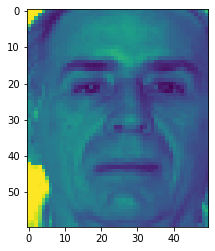

The Predicted image is


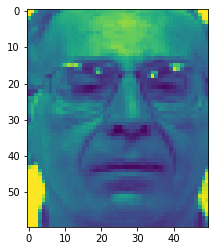

The test image is


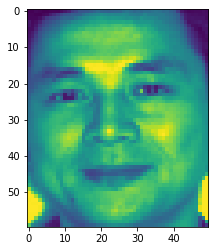

The Predicted image is


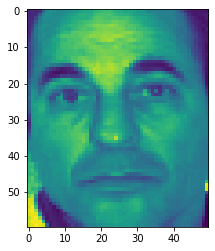

The test image is


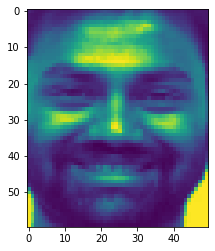

The Predicted image is


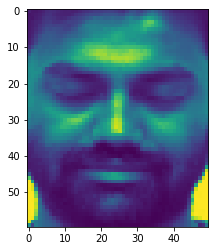

The test image is


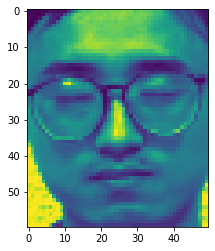

The Predicted image is


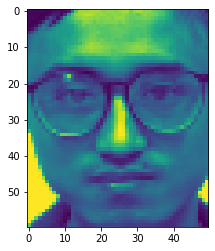

The test image is


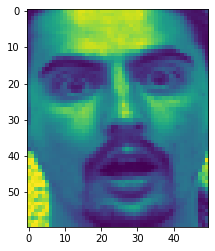

The Predicted image is


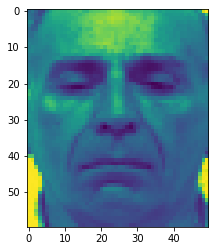

The test image is


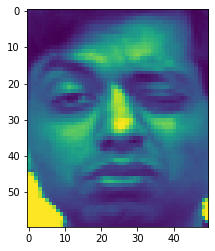

The Predicted image is


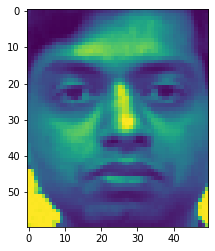

The test image is


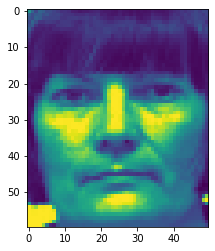

The Predicted image is


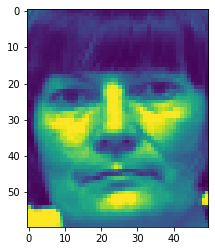

The test image is


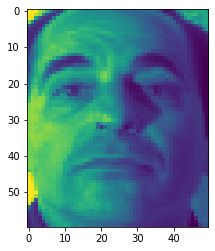

The Predicted image is


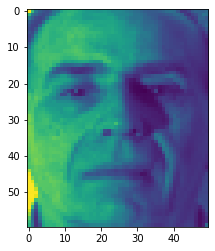

The test image is


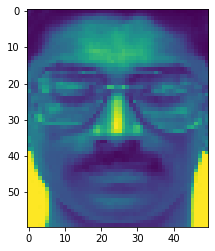

The Predicted image is


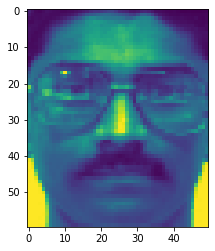

The test image is


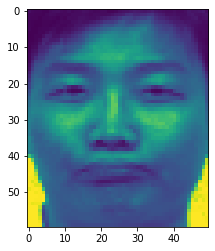

The Predicted image is


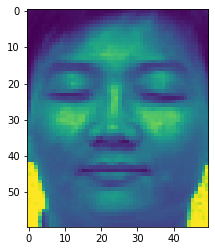

The test image is


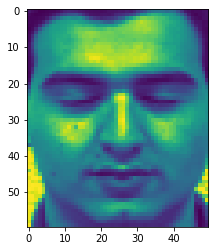

The Predicted image is


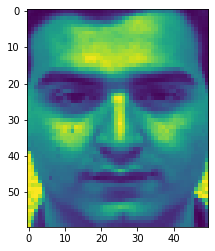

In [19]:
# Showing the predicted image for test image
for k,v in dict.items():
    print("The test image is")
    plt.imshow(Xtotal[k].reshape(60,50))
    plt.show()
    print("The Predicted image is")
    plt.imshow(Xtotal[v].reshape(60,50))
    plt.show()

# Que. 2

In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt
def Generation_of_Hypersphere(n,d,radii,C):
  S=[]
  for i in range(n):
    point =np.array([random.uniform(-1, 1) for _ in range(d)])
    p=point/np.linalg.norm(point)
    r=random.uniform(0, radii)
    p=C+r*p
    S.append(p)
  return np.array(S)
def Centroids_and_CovMat(S):
  Centroid=np.mean(S,axis=0)
  Cov=np.cov(S.T)
  return Centroid,Cov
def compute_lda_projection(mean1, mean2, cov1, cov2):
    u= np.linalg.inv((cov1 + cov2)) @ (mean1 - mean2).T
    w=u/ np.linalg.norm(u)
    return w

##For || C1 - C2 || > 2*Radius

radius is 10
Distance between centres is  39.93506120914352
shape of S1 (1000, 10)
shape of W (10,)
shape of projected (1000,)


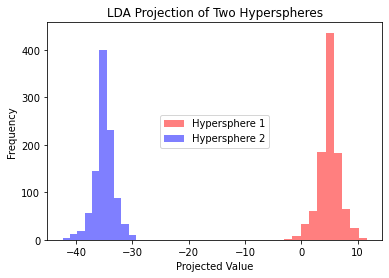

In [27]:
n=1000
d=10
#C=np.array([random.uniform(-1, 1) for _ in range(d)])
#C=C/np.linalg.norm(C)
#rad=int(input("Enter the radii"))
rad=10
print("radius is",rad)
# Generate a random point in 10-dimensional space
C1 = np.random.uniform(0, 10, size=d) 
# Generate a random unit vector
unit_vector = np.random.randn(d)
unit_vector /= np.linalg.norm(unit_vector)
# Generate a random multiple of the unit vector
multiplier = np.random.uniform(2*rad, 4*rad)
# Generate the second point
C2 = C1 + multiplier * unit_vector
print("Distance between centres is ",np.linalg.norm(C1-C2))
S1=Generation_of_Hypersphere(n,d,rad,C1)
print("shape of S1",S1.shape)
S2=Generation_of_Hypersphere(n,d,rad,C2)
m1,Cov1=Centroids_and_CovMat(S1)
# print(m1)
m2,Cov2=Centroids_and_CovMat(S2)
W=compute_lda_projection(m1, m2, Cov1, Cov2)
print("shape of W",W.shape)
projected_points1 =S1@W
print("shape of projected",projected_points1.shape)
projected_points2 =S2@W
plt.hist(projected_points1, color='red', alpha=0.5, label='Hypersphere 1')
plt.hist(projected_points2, color='blue', alpha=0.5, label='Hypersphere 2')
plt.xlabel('Projected Value')
plt.ylabel('Frequency')
plt.title('LDA Projection of Two Hyperspheres')
plt.legend(loc='center')
plt.show()

For || C1 - C2 || = 2*Radius - epsilon

Radius :  10
Distance between two centers :  18.0
shape of S1 (1000, 2)
shape of W (2,)
shape of projected (1000,)


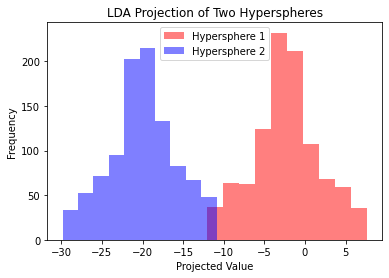

In [28]:
num = 1000
dim = 2
radius = 10
print("Radius : ",radius)
e=2
C1 = np.random.uniform(0, 10, size=dim) 
multiplier = 2*radius-e
# Generate the second point
unit_vector = np.random.randn(dim)
unit_vector /= np.linalg.norm(unit_vector)
C2 = C1 + multiplier * unit_vector
dist=np.linalg.norm(C1-C2)
print("Distance between two centers : ",dist)  
S1 =  Generation_of_Hypersphere(num,dim,radius,C1)
print("shape of S1",S1.shape)
S2 =  Generation_of_Hypersphere(num,dim,radius,C2)
#S1=Generation_of_Hypersphere(n,d,C1,rad)
#S2=Generation_of_Hypersphere(n,d,C2,rad)
m1,Cov1=Centroids_and_CovMat(S1)
m2,Cov2=Centroids_and_CovMat(S2)
W=compute_lda_projection(m1, m2, Cov1, Cov2)
print("shape of W",W.shape)
projected_points1 =S1@W.T
print("shape of projected",projected_points1.shape)
projected_points2 =S2@W.T
plt.hist(projected_points1, color='red', alpha=0.5, label='Hypersphere 1')
plt.hist(projected_points2, color='blue', alpha=0.5, label='Hypersphere 2')
plt.xlabel('Projected Value')
plt.ylabel('Frequency')
plt.title('LDA Projection of Two Hyperspheres')
plt.legend()
plt.show()

For Radius < || C1 - C2 || < 2*Radius

Radius :  10
Distance between two centers :  11.866292169903078


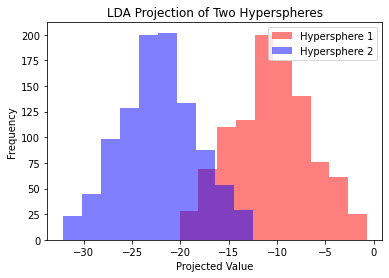

In [30]:
num = 1000
dim = 2
radius = 10
print("Radius : ",radius)
C1 = np.random.uniform(0, 10, size=dim) 
multiplier = np.random.uniform(radius,2*radius)
# Generate the second point
unit_vector = np.random.randn(dim)
unit_vector /= np.linalg.norm(unit_vector)
C2 = C1 + multiplier * unit_vector
dist=np.linalg.norm(C1-C2)
print("Distance between two centers : ",dist)   
S1 =  Generation_of_Hypersphere(num,dim,radius,C1)
#print(Hyper_Sphere1.shape)
S2 =  Generation_of_Hypersphere(num,dim,radius,C2)
#S1=Generation_of_Hypersphere(n,d,C1,rad)
#S2=Generation_of_Hypersphere(n,d,C2,rad)
m1,Cov1=Centroids_and_CovMat(S1)
m2,Cov2=Centroids_and_CovMat(S2)
W=compute_lda_projection(m1, m2, Cov1, Cov2)
projected_points1 =S1@W.T
projected_points2 =S2@W.T
plt.hist(projected_points1, color='red', alpha=0.5, label='Hypersphere 1')
plt.hist(projected_points2, color='blue', alpha=0.5, label='Hypersphere 2')
plt.xlabel('Projected Value')
plt.ylabel('Frequency')
plt.title('LDA Projection of Two Hyperspheres')
plt.legend()
plt.show()

For || C1 - C2 || < Radius

Radius :  10
Distance between two centers :  3.56131387184204


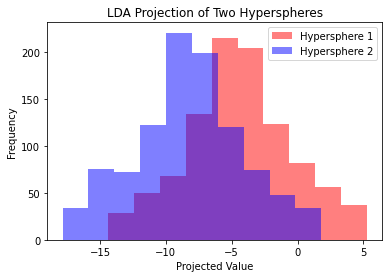

In [33]:
num = 1000
dim = 2
radius = 10
print("Radius : ",radius)
C1 = np.random.uniform(0, 10, size=dim) 
multiplier = np.random.uniform(0,radius)
# Generate the second point
unit_vector = np.random.randn(dim)
unit_vector /= np.linalg.norm(unit_vector)
C2 = C1 + multiplier * unit_vector
dist=np.linalg.norm(C1-C2)
print("Distance between two centers : ",dist)   
S1 =  Generation_of_Hypersphere(num,dim,radius,C1)
#print(Hyper_Sphere1.shape)
S2 =  Generation_of_Hypersphere(num,dim,radius,C2)
m1,Cov1=Centroids_and_CovMat(S1)
m2,Cov2=Centroids_and_CovMat(S2)
W=compute_lda_projection(m1, m2, Cov1, Cov2)
projected_points1 =S1@W.T
projected_points2 =S2@W.T
plt.hist(projected_points1, color='red', alpha=0.5, label='Hypersphere 1')
plt.hist(projected_points2, color='blue', alpha=0.5, label='Hypersphere 2')
plt.xlabel('Projected Value')
plt.ylabel('Frequency')
plt.title('LDA Projection of Two Hyperspheres')
plt.legend()
plt.show()